In [51]:
import numpy as np
import pandas as pd
import os

file_path = r"D:/ML/ML.csv"
df = pd.read_csv(file_path)
df

,ID,Number of room,Price
0,212001,1,28000
1,212002,3,114000
2,212003,3,112500
3,212004,3,115000
4,212005,2,104000
5,212006,4,234000
6,212007,1,22000
7,212008,4,68000
8,212009,2,24000
9,212010,3,66000


In [52]:
df.isnull().sum()

ID                0
Number of room    0
Price             0
dtype: int64

In [53]:
filtered_df = df[df['Price'] > 50000]
res = filtered_df[['ID', 'Number of room', 'Price']]
print(res)


        ID  Number of room   Price
1   212002               3  114000
2   212003               3  112500
3   212004               3  115000
4   212005               2  104000
5   212006               4  234000
7   212008               4   68000
9   212010               3   66000
11  212012               1  560000


In [56]:
df_cleaned = df.dropna(subset=['Price'])
print(df_cleaned)


        ID  Number of room   Price
0   212001               1   28000
1   212002               3  114000
2   212003               3  112500
3   212004               3  115000
4   212005               2  104000
5   212006               4  234000
6   212007               1   22000
7   212008               4   68000
8   212009               2   24000
9   212010               3   66000
10  212011               2   28000
11  212012               1  560000
12  212013               2   20000
13  212014               1   40000
14  212015               1   40000


In [61]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1) 
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (10, 2)
X_test shape: (5, 2)
y_train shape: (10,)
y_test shape: (5,)


In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train[['Number of room']], y_train)

y_pred = model.predict(X_test[['Number of room']])

print(f"Intercept: {model.intercept_}")



Intercept: 1925.9259259259488


In [66]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 59445104252.40055
R-squared: -0.46518137339594534


In [67]:
new_houses = pd.DataFrame({'Number of room': [2, 3, 4, 5]})

predicted_prices = model.predict(new_houses[['Number of room']])

new_houses['Predicted Price'] = predicted_prices
print(new_houses)


   Number of room  Predicted Price
0               2     56555.555556
1               3     83870.370370
2               4    111185.185185
3               5    138500.000000


D:\Users\MUIZZ KHAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


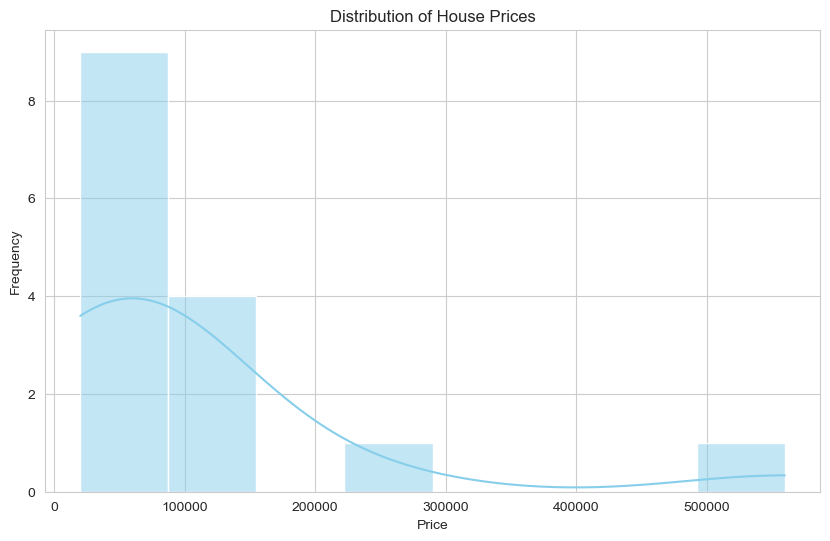

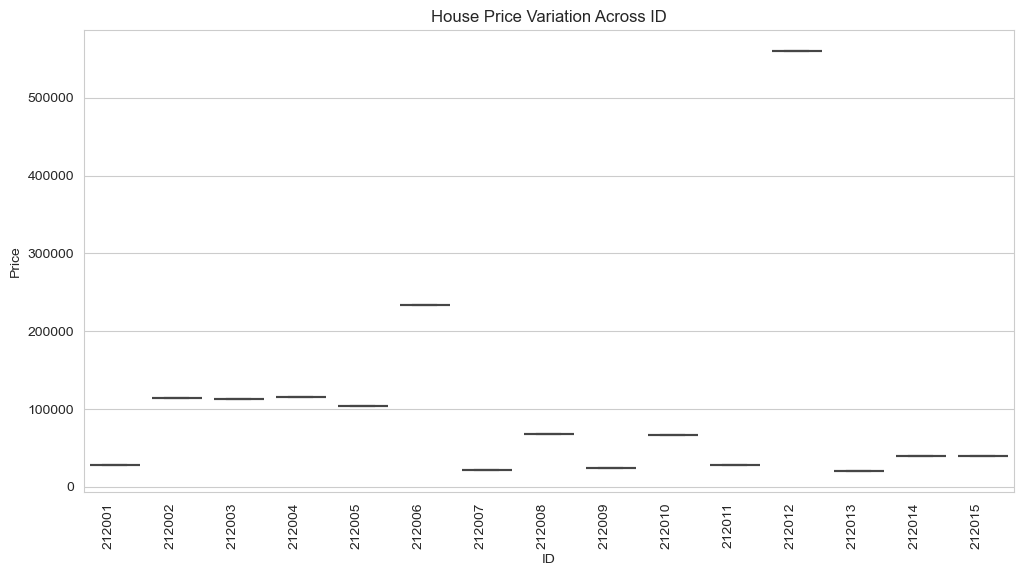

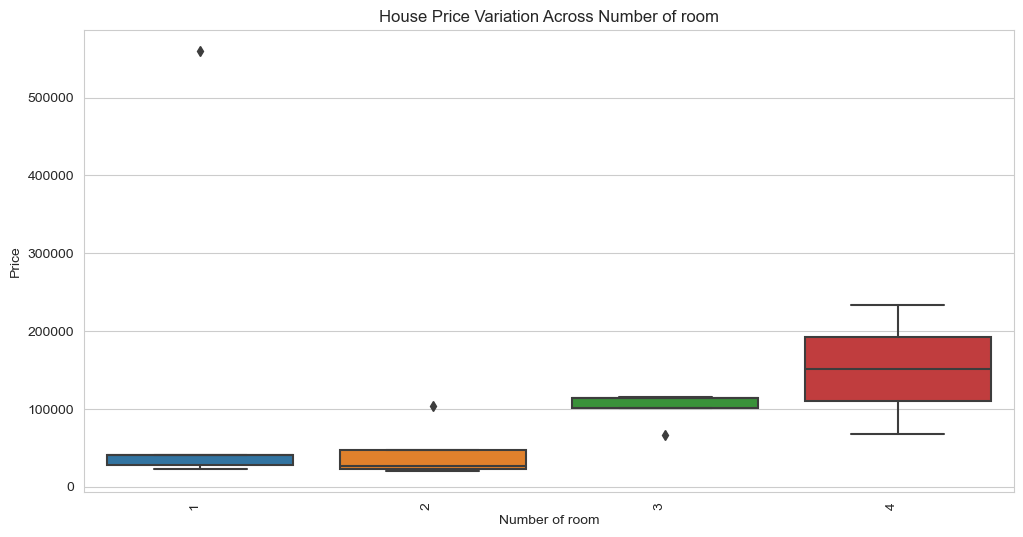

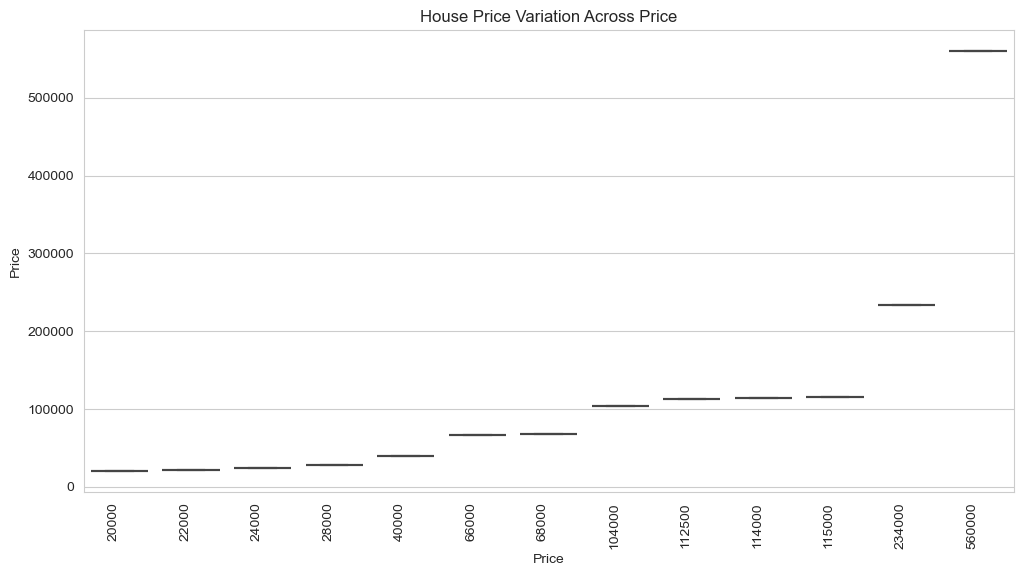

In [70]:
#visual representation
import matplotlib.pyplot as plt
import seaborn as sns
#Seaborn is a Python data visualization library based on Matplotlib

# Set style for seaborn plots
sns.set_style("whitegrid")

# Distribution of laptop prices (histogram or kernel density plot)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Explore how prices vary across different categories (box plots)
categories = ['ID', 'Number of room', 'Price']

for category in categories:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=category, y='Price', data=df)
    plt.title(f'House Price Variation Across {category}')
    plt.xlabel(category)
    plt.ylabel('Price')
    plt.xticks(rotation=90, ha='right')
    plt.show()